### Importing all the required dependencies

In [2]:
%pip install imbalanced-learn


     ---------------------------------------- 0.0/240.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/240.0 kB ? eta -:--:--
     ---- -------------------------------- 30.7/240.0 kB 187.9 kB/s eta 0:00:02
     ------ ------------------------------ 41.0/240.0 kB 179.6 kB/s eta 0:00:02
     ----------- ------------------------- 71.7/240.0 kB 328.6 kB/s eta 0:00:01
     -------------------------- --------- 174.1/240.0 kB 655.4 kB/s eta 0:00:01
     -------------------------- --------- 174.1/240.0 kB 655.4 kB/s eta 0:00:01
     ------------------------------ ----- 204.8/240.0 kB 541.9 kB/s eta 0:00:01
     ------------------------------------ 240.0/240.0 kB 612.6 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install tensorflow


     ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
     ---------------------------------------- 0.0/331.7 MB ? eta -:--:--
     -------------------------------------- 0.0/331.7 MB 217.9 kB/s eta 0:25:23
     -------------------------------------- 0.0/331.7 MB 393.8 kB/s eta 0:14:03
     -------------------------------------- 0.1/331.7 MB 409.6 kB/s eta 0:13:30
     -------------------------------------- 0.1/331.7 MB 708.1 kB/s eta 0:07:49
     ---------------------------------------- 0.4/331.7 MB 1.8 MB/s eta 0:03:06
     ---------------------------------------- 0.6/331.7 MB 2.2 MB/s eta 0:02:30
     ---------------------------------------- 0.8/331.7 MB 2.5 MB/s eta 0:02:15
     ---------------------------------------- 1.1/331.7 MB 2.9 MB/s eta 0:01:53
     ---------------------------------------- 1.4/331.7 MB 3.3 MB/s eta 0:01:40
     ---------------------------------------- 1.6/331.7 MB 3.4 MB/s eta 0:01:37
     ---------------------------------------- 1.8/331

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import warnings
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import pickle
import re
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, log_loss
from sklearn.utils.class_weight import compute_class_weight

# TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, save_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2, l1

# To disable warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')
tf.config.optimizer.set_jit(False)

# Visualization settings
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

# Pandas Settings
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.max_rows", 300)
pd.set_option("display.max_columns", 200)

### Reading the Dataset into the pandas dataframe

In [5]:
df = pd.read_csv("C:/Users/raanesh/Downloads/home-credit-default-risk/credit_score_classification_train.csv")

#### Visulaizing the first 5 rows and the last 5 rows

In [7]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.000,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,6,7,2,"Auto Loan, and Student Loan",23,7,11.5,3.000,_,502.38,34.664,31 Years and 6 Months,No,35.104,60.97133255718485,High_spent_Large_value_payments,479.866,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,6,7,2,"Auto Loan, and Student Loan",18,7,11.5,3.000,_,502.38,40.566,31 Years and 7 Months,No,35.104,54.18595028760385,High_spent_Medium_value_payments,496.652,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,6,5729,2,"Auto Loan, and Student Loan",27,6,11.5,3.000,Good,502.38,41.256,31 Years and 8 Months,No,35.104,24.02847744864441,High_spent_Large_value_payments,516.809,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.416,4,6,7,2,"Auto Loan, and Student Loan",20,NaN,11.5,3.000,Good,502.38,33.638,31 Years and 9 Months,No,35.104,251.67258219721603,Low_spent_Large_value_payments,319.165,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.416,4,6,7,2,"Auto Loan, and Student Loan",18,6,11.5,3.000,Good,502.38,34.192,31 Years and 10 Months,No,35.104,167.1638651610451,!@9#%8,393.674,Poor


#### Looking for the stats about the data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.000,4194.171,3183.686,303.645,1625.568,3093.745,5957.448,15204.633
Num_Bank_Accounts,100000.000,17.091,117.405,-1.000,3.000,6.000,7.000,1798.000
Num_Credit_Card,100000.000,22.474,129.057,0.000,4.000,5.000,7.000,1499.000
Interest_Rate,100000.000,72.466,466.423,1.000,8.000,13.000,20.000,5797.000
Delay_from_due_date,100000.000,21.069,14.860,-5.000,10.000,18.000,28.000,67.000
Num_Credit_Inquiries,98035.000,27.754,193.177,0.000,3.000,6.000,9.000,2597.000
Credit_Utilization_Ratio,100000.000,32.285,5.117,20.000,28.053,32.306,36.497,50.000
Total_EMI_per_month,100000.000,1403.118,8306.041,0.000,30.307,69.249,161.224,82331.000


In [11]:
df.describe(include="object").T

,count,unique,top,freq
ID,100000,100000,0x25fb6,1
Customer_ID,100000,12500,CUS_0x942c,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,17273.83,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


### Creating a correlation heatmap with credit score

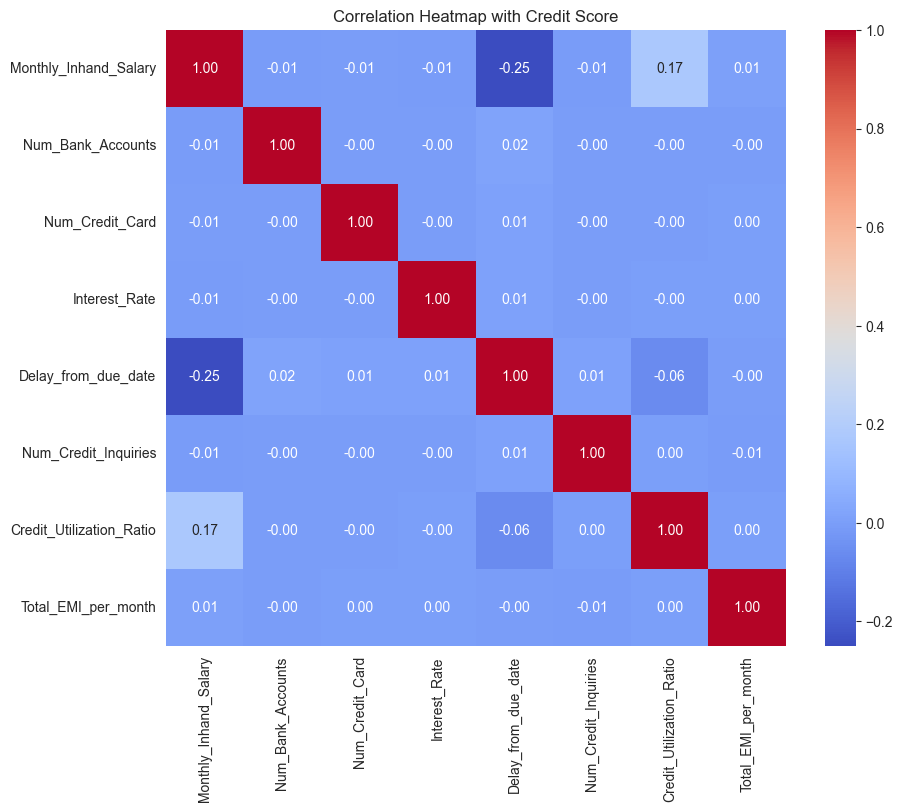

In [12]:
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

correlation_matrix = numeric_df.corr()

#Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap with Credit Score")
plt.show()

In [13]:
# Looking for the Numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

In [15]:
print(df.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


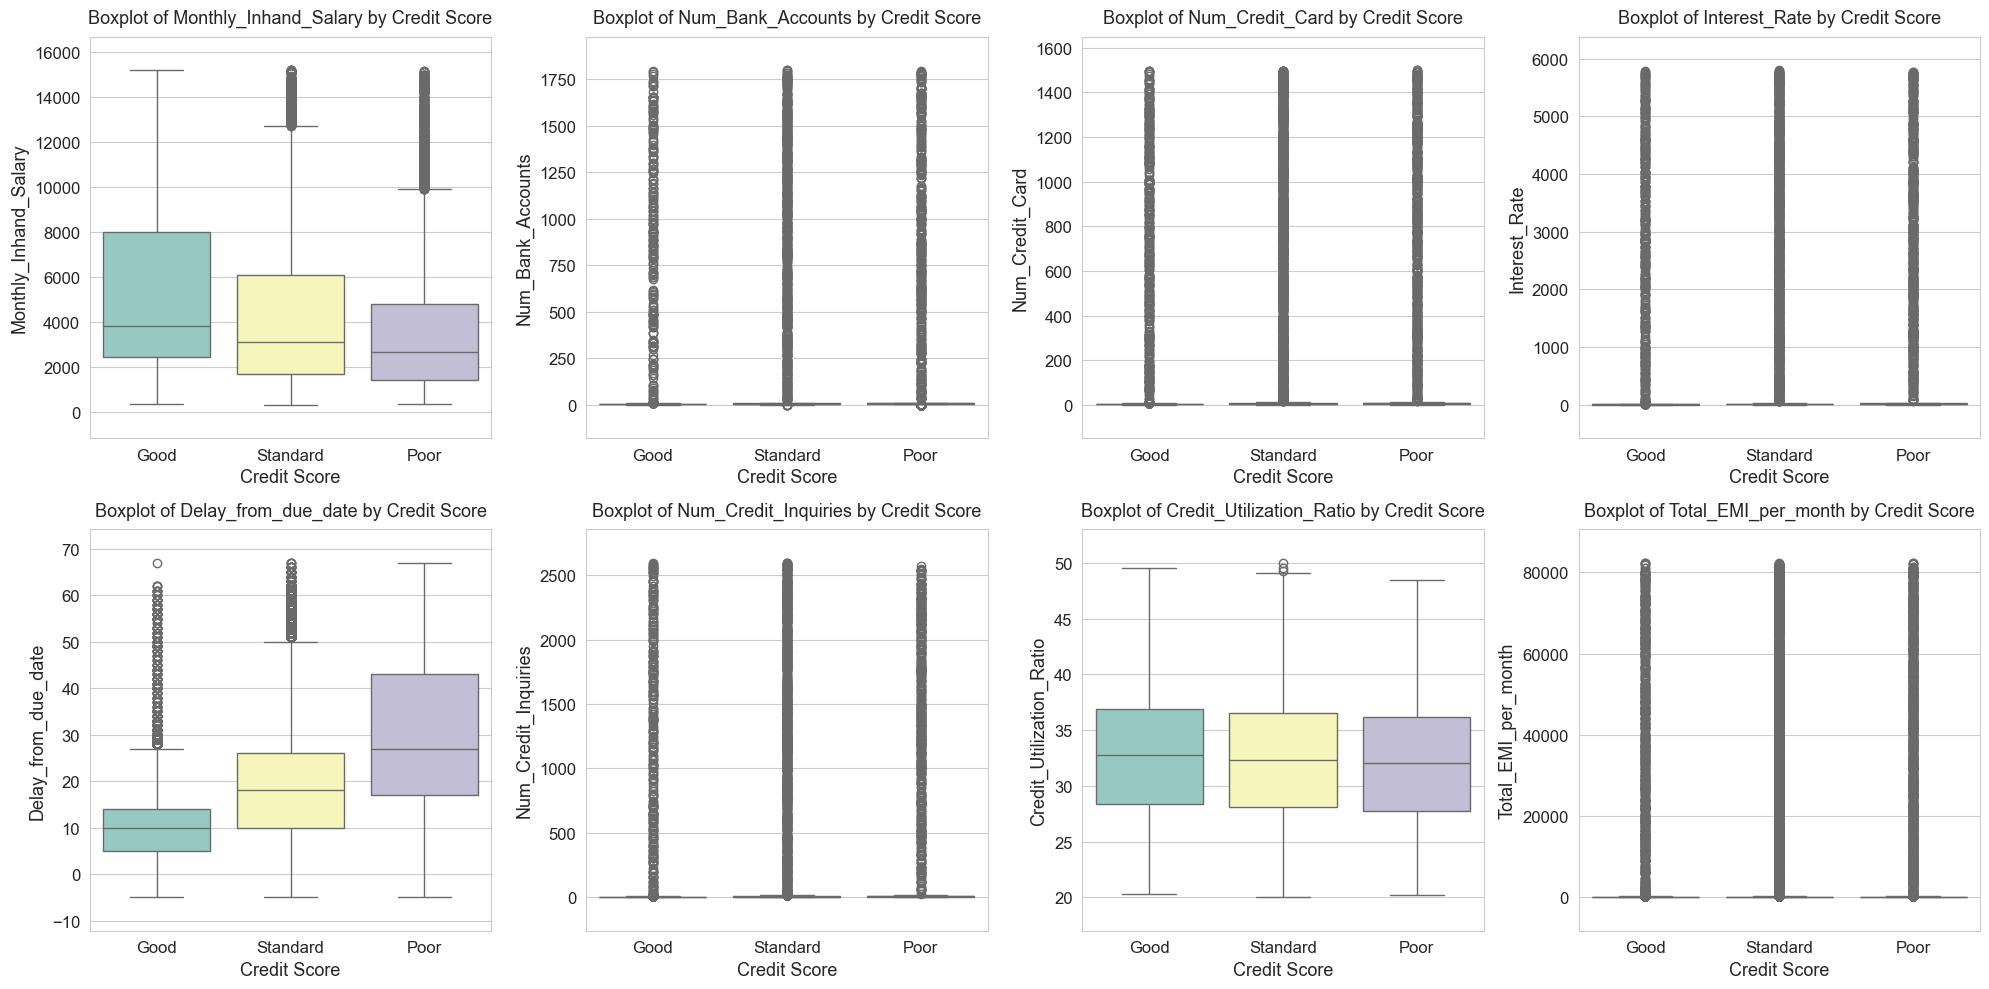

In [18]:
# Calculating the number of rows and columns
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

# Plotting
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='Credit_Score', y=col, data=df, palette='Set3')
    plt.title(f'Boxplot of {col} by Credit Score', fontsize=13, pad=10)
    plt.xlabel('Credit Score', fontsize=13)
    plt.ylabel(col, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Automatically adjust y-axis limits
    plt.ylim(df[col].min() - (df[col].max() - df[col].min()) * 0.1,
             df[col].max() + (df[col].max() - df[col].min()) * 0.1)

# Adjusting the horizontal (wspace) and vertical (hspace) spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.7)

plt.tight_layout()
plt.show()

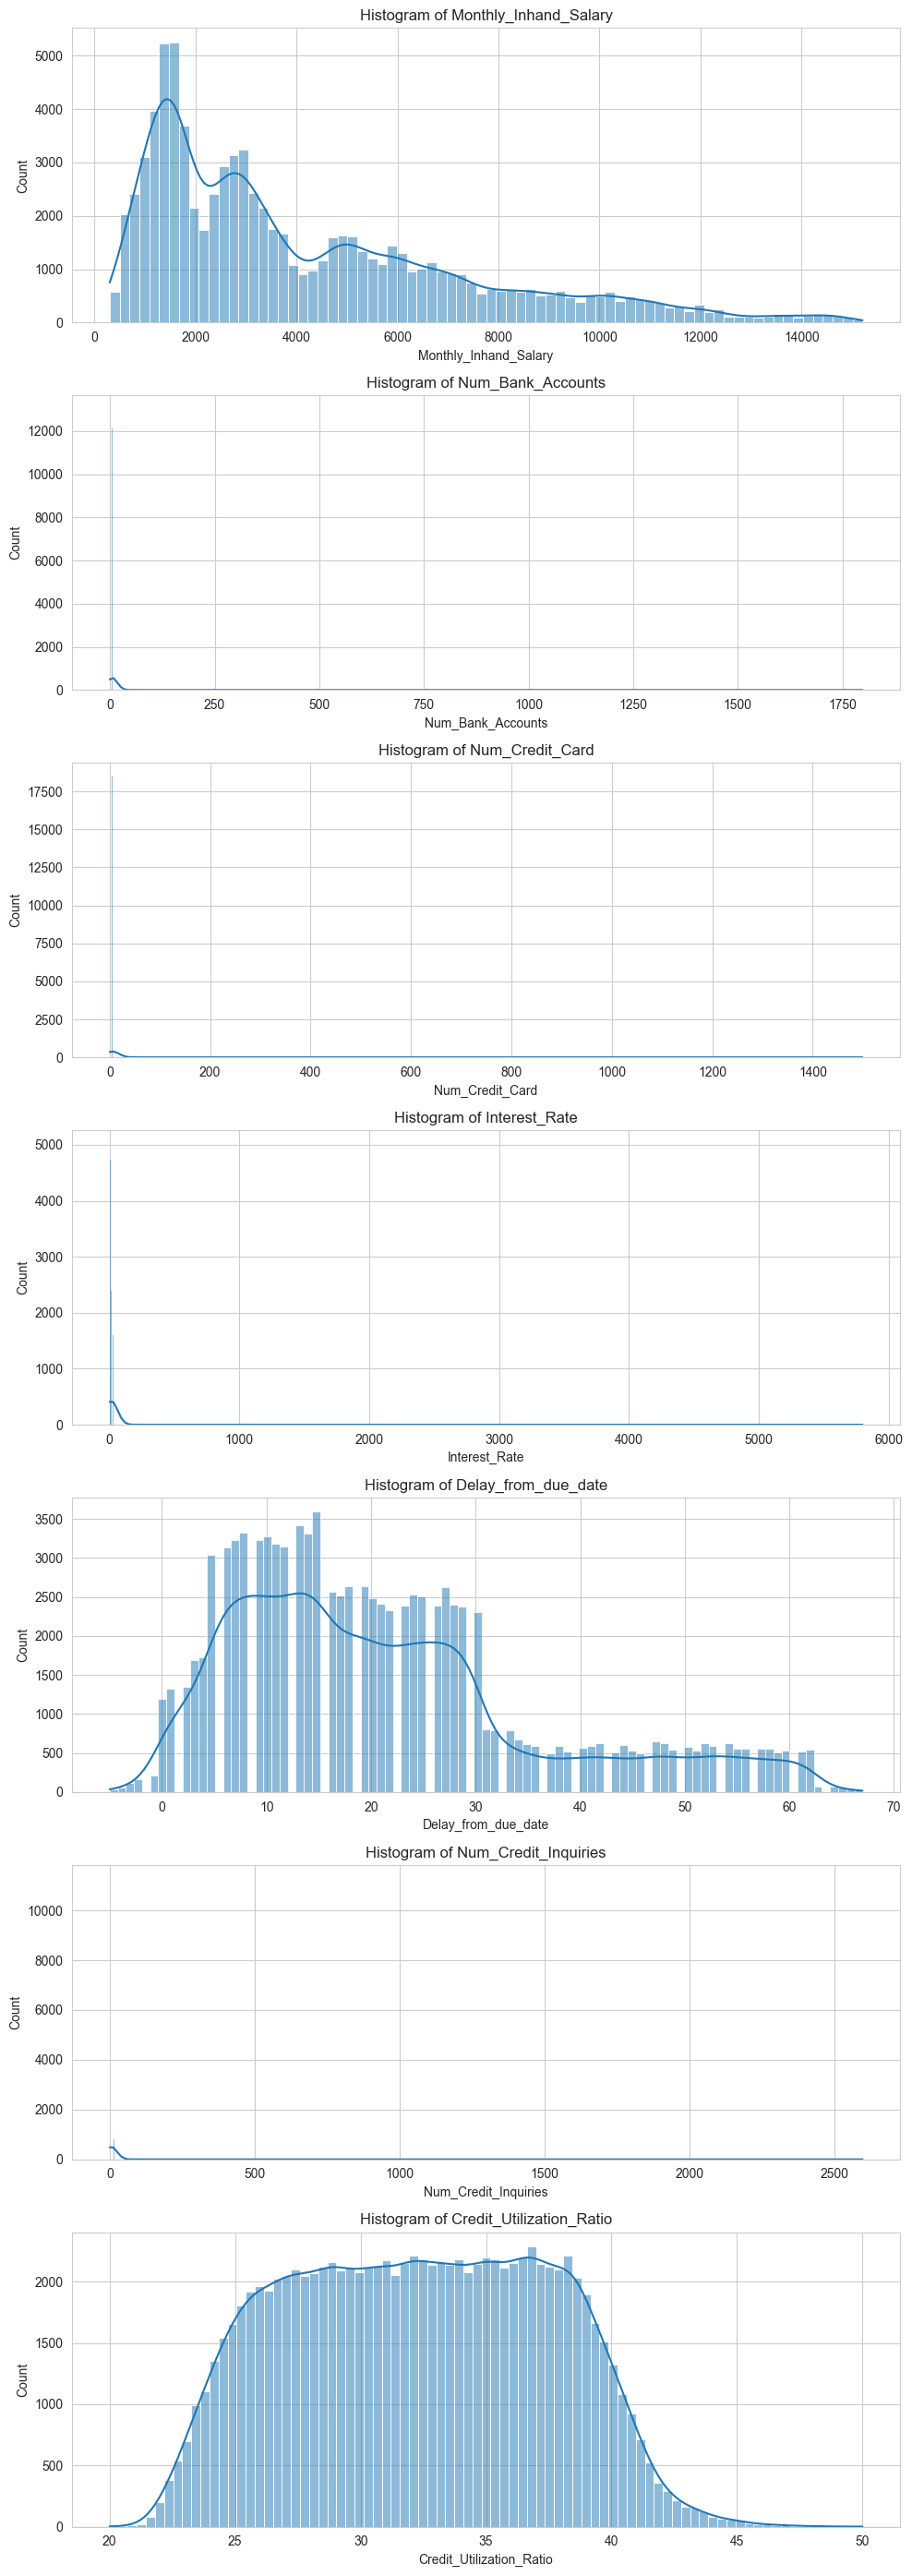

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Getting all numerical features except the last one
features = numeric_columns[:-1]

# Defining the layout
n_cols = 1
n_rows = len(features)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))
plt.subplots_adjust(hspace=0.5)

# Ensuring that the axes is always iterable
if n_rows == 1:
    axes = [axes]

# Plotting
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}', fontsize=12)

plt.tight_layout()
plt.show()


In [21]:
# Function to detect outliers
def detect_outliers_iqr(df):
    outliers = {}

    # Select only numerical columns
    numeric_df = df.select_dtypes(include=['number'])

    for column in numeric_df.columns:
        # Calculate the first (Q1) and third quartiles (Q3)
        Q1 = numeric_df[column].quantile(0.25)
        Q3 = numeric_df[column].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Determine the lower and upper bounds
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Identify outliers
        outlier_mask = (numeric_df[column] < lower_bound) | (numeric_df[column] > upper_bound)
        outliers[column] = numeric_df[column][outlier_mask]

    return outliers

# Detect outliers
outlier_results = detect_outliers_iqr(df)

# Print the results
for column, outlier_values in outlier_results.items():
    if not outlier_values.empty:
        print(f"{column} outliers:")
        print(outlier_values)
    else:
        print(f"For {column} no outliers.")

For Monthly_Inhand_Salary no outliers.
Num_Bank_Accounts outliers:
267      1414
288      1231
310        67
339       572
356      1488
         ... 
99591     813
99638    1481
99666     474
99722     697
99916     182
Name: Num_Bank_Accounts, Length: 1314, dtype: int64
Num_Credit_Card outliers:
10       1385
40       1288
157      1029
163       488
207      1381
         ... 
99611     514
99615     232
99619    1430
99769     679
99811     158
Name: Num_Credit_Card, Length: 2266, dtype: int64
Interest_Rate outliers:
44       5318
89        433
167      5240
178      4975
229       668
         ... 
99791    4396
99801     387
99882    1947
99914     360
99997    5729
Name: Interest_Rate, Length: 2034, dtype: int64
For Delay_from_due_date no outliers.
Num_Credit_Inquiries outliers:
173     1050.000
193     1044.000
198     1936.000
234      568.000
312     1618.000
          ...   
99717   1361.000
99769    310.000
99789     93.000
99800   2209.000
99872     74.000
Name: Num_Credit

In [24]:
df["Credit_Score"].value_counts(normalize = True) # 2:Good, 1: Standard, 0: Poor

Credit_Score
Standard   0.532
Poor       0.290
Good       0.178
Name: proportion, dtype: float64

### Data Preprocessing

In [28]:
# List of unique loan values
unique_loan_types = ['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan',
                     'No Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']

# Adding a new column for each unique loan type
for loan_type in unique_loan_types:
    # Replace '-' and spaces with underscores, lowercase
    cleaned_loan_type = loan_type.replace(' ', '_').replace('-', '_').lower()

    # Count occurrences safely (handle NaN)
    df[cleaned_loan_type] = df['Type_of_Loan'].apply(
        lambda x: x.count(loan_type) if isinstance(x, str) else 0
    )

In [29]:
df = df.drop([
    "ID", "Customer_ID", "Name", "SSN", "Type_of_Loan"], axis=1)

df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,auto_loan,credit_builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan
0,January,23,Scientist,19114.12,1824.843,3,4,3,4,3,7,11.27,4.000,_,809.98,26.823,22 Years and 1 Months,No,49.575,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,1,1,0,1,0,0,0,0,1,0
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.000,Good,809.98,31.945,NaN,No,49.575,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,1,1,0,1,0,0,0,0,1,0
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,7,_,4.000,Good,809.98,28.609,22 Years and 3 Months,No,49.575,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,1,1,0,1,0,0,0,0,1,0
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,4,6.27,4.000,Good,809.98,31.378,22 Years and 4 Months,No,49.575,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,1,1,0,1,0,0,0,0,1,0
4,May,23,Scientist,19114.12,1824.843,3,4,3,4,6,NaN,11.27,4.000,Good,809.98,24.797,22 Years and 5 Months,No,49.575,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,1,1,0,1,0,0,0,0,1,0


In [31]:
payment_mapping = {
    'High_spent_Large_value_payments': 6,#Successfully managing large debts provides the most positive contribution to the credit score.
    'High_spent_Medium_value_payments': 5, # Medium-value payments with high spending positively impact the credit score.
    'High_spent_Small_value_payments': 4, # Small payments can negatively affect the credit score if debts accumulate over time.
    'Low_spent_Large_value_payments': 3, # Shows quick financial responsibility, positively affecting the credit score.
    'Low_spent_Medium_value_payments': 2, # Contributes positively to the credit score by demonstrating debt management.
    'Low_spent_Small_value_payments': 1 # May limit the credit history and provide minimal contribution to the credit score
}


df['Payment_Behaviour'] = df['Payment_Behaviour'].map(payment_mapping)

df['Payment_Behaviour'] = pd.to_numeric(df['Payment_Behaviour'], downcast='integer')

In [33]:
# Converting the credit_mix column to numerical values

df['Credit_Mix'] = df['Credit_Mix'].map({'Good': 2, 'Standard': 1, 'Bad': 0})

df['Credit_Mix'] = pd.to_numeric(df['Credit_Mix'], downcast='integer')

In [34]:
# ConvertING the payment_of_min_amount column to numerical values

df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0})

df['Payment_of_Min_Amount'] = pd.to_numeric(df['Payment_of_Min_Amount'], downcast='integer')

In [36]:
df = pd.get_dummies(df, columns=['Occupation'])

In [38]:
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8
}

#Mapping
df['Month'] = df['Month'].map(month_map)

df['Month'] = pd.to_numeric(df['Month'], downcast='integer')

In [39]:
# Separating the features and the target variable
X = df.drop("Credit_Score", axis=1)
y = df.Credit_Score

In [40]:
y.value_counts(normalize=True) # unbalanced data  2:Good, 1: Standard, 0: Poor

Credit_Score
Standard   0.532
Poor       0.290
Good       0.178
Name: proportion, dtype: float64

In [41]:
df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,auto_loan,credit_builder_loan,debt_consolidation_loan,home_equity_loan,mortgage_loan,no_loan,not_specified,payday_loan,personal_loan,student_loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Occupation________
0,1,23,19114.12,1824.843,3,4,3,4,3,7,11.27,4.000,NaN,809.98,26.823,22 Years and 1 Months,0.000,49.575,80.41529543900253,4.000,312.49408867943663,Good,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,2,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.000,NaN,809.98,31.945,NaN,0.000,49.575,118.28022162236736,3.000,284.62916249607184,Good,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,3,-500,19114.12,NaN,3,4,3,4,3,7,_,4.000,NaN,809.98,28.609,22 Years and 3 Months,0.000,49.575,81.699521264648,2.000,331.2098628537912,Good,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,4,23,19114.12,NaN,3,4,3,4,5,4,6.27,4.000,NaN,809.98,31.378,22 Years and 4 Months,0.000,49.575,199.4580743910713,1.000,223.45130972736786,Good,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,5,23,19114.12,1824.843,3,4,3,4,6,NaN,11.27,4.000,NaN,809.98,24.797,22 Years and 5 Months,0.000,49.575,41.420153086217326,5.000,341.48923103222177,Good,1,1,0,1,0,0,0,0,1,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


### Performing Train Test Split Operation

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05,stratify=y, random_state=42)

In [46]:
# Converting all columns to numeric if possible
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

In [47]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [48]:
# Columns to apply RobustScaler
robust_columns = ['Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', "Annual_Income", "Monthly_Inhand_Salary"]

# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Creating the ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)])

# Applying to training data
X_train_scaled= scaler.fit_transform(X_train)

# Applying to test data
X_test_scaled = scaler.transform(X_test)

In [49]:
print(set(robust_columns) - set(X_train.columns))
print(set(standard_columns) - set(X_train.columns))

set()
set()


In [50]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [51]:
pd.Series(y_train).value_counts()

Standard    50515
Poor        27548
Good        16937
Name: count, dtype: int64

In [52]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)
    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Model Training (Artificial Neural Network Model)

In [53]:
# Compute class_weights
class_weights_array = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: weight for i, weight in zip(np.unique(y_train), class_weights_array)}

In [57]:
# Converting all the columns to numeric (coerce errors to NaN)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaNs with 0 or median
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [58]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

robust_columns = ['Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', "Annual_Income", "Monthly_Inhand_Salary"]
robust_columns = [col for col in robust_columns if col in X_train.columns]
standard_columns = [col for col in X_train.columns if col not in robust_columns]

scaler = ColumnTransformer([
    ('standard', StandardScaler(), standard_columns),
    ('robust', RobustScaler(), robust_columns)
])

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit on y_train and transform both train and test
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Now y_train_encoded and y_test_encoded are integers
print("Classes:", le.classes_)

Classes: ['Good' 'Poor' 'Standard']


In [61]:
tf.random.set_seed(42)

# Model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu',),
    BatchNormalization(),
    Dropout(0.35),
    
    Dense(512, activation='relu', kernel_regularizer=l1(1e-4)),
    BatchNormalization(),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(3, activation='softmax')
])
# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping with patience and best weight restoration
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=35,
                               restore_best_weights=True)

# Model training
history = model.fit(
    x=X_train_scaled,
    y=y_train_encoded,
    validation_data=(X_test_scaled, y_test_encoded),
    batch_size=1024,
    epochs=500,
    verbose=1,
    callbacks=[early_stopping],
    class_weight=class_weights
)



Epoch 1/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4831 - loss: 1.6675 - val_accuracy: 0.5706 - val_loss: 1.5815
Epoch 2/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5608 - loss: 1.4783 - val_accuracy: 0.5920 - val_loss: 1.4372
Epoch 3/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5885 - loss: 1.4091 - val_accuracy: 0.6002 - val_loss: 1.3715
Epoch 4/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5992 - loss: 1.3601 - val_accuracy: 0.6154 - val_loss: 1.2982
Epoch 5/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6077 - loss: 1.3177 - val_accuracy: 0.6146 - val_loss: 1.2665
Epoch 6/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6106 - loss: 1.2800 - val_accuracy: 0.6230 - val_loss: 1.2313
Epoch 7/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6149 - loss: 1.2440 - val_accuracy: 0.6274 - val_loss: 1.2002
Epoch 8/500
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6204 - loss: 1.2087 - val_accuracy: 0.

<Axes: >

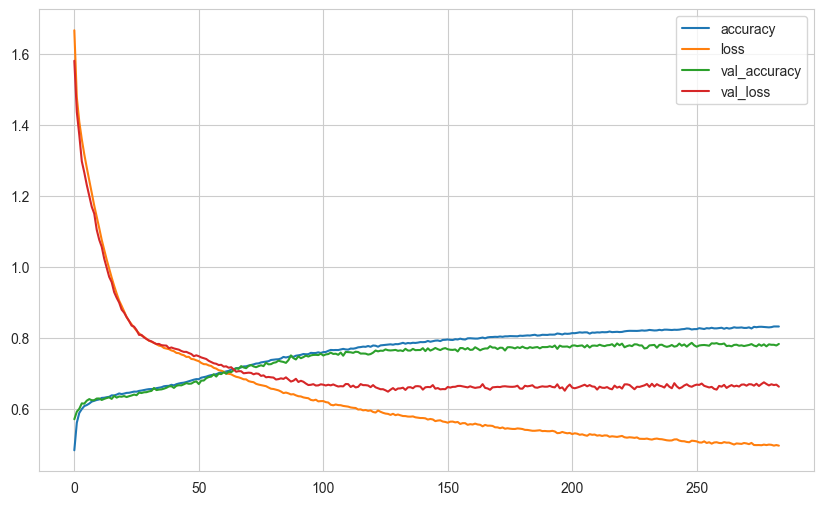

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Final Model Training

In [65]:
print(X.shape)
print(y.shape)

(100000, 47)
(100000,)


In [69]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# Columns to apply RobustScaler
robust_columns = ['Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', "Annual_Income", "Monthly_Inhand_Salary"]

# Keep only columns that exist in X_train
robust_columns = [col for col in robust_columns if col in X_train.columns]

# Columns to apply StandardScaler (All columns except robust columns)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Keep only numeric columns
standard_columns = [col for col in standard_columns if pd.api.types.is_numeric_dtype(X_train[col])]
robust_columns = [col for col in robust_columns if pd.api.types.is_numeric_dtype(X_train[col])]

print("StandardScaler columns:", standard_columns)
print("RobustScaler columns:", robust_columns)

# Creating the ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)
    ]
)

# Fit the scaler on X_train
scaler.fit(X_train)


StandardScaler columns: ['Month', 'Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'auto_loan', 'credit_builder_loan', 'debt_consolidation_loan', 'home_equity_loan', 'mortgage_loan', 'no_loan', 'not_specified', 'payday_loan', 'personal_loan', 'student_loan', 'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer', 'Occupation________']
RobustScaler columns: ['Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Annual_Income', 

,transformers,"[('standard', ...), ('robust', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [70]:
pickle.dump(scaler, open("credit_score_scaler", 'wb'))

In [ ]:
X_scaled = scaler.transform(X)

ValueError: could not convert string to float: '28_'

In [72]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# Columns to apply RobustScaler
robust_columns = ['Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', "Annual_Income", "Monthly_Inhand_Salary"]

# Keep only columns that exist in X_train
robust_columns = [col for col in robust_columns if col in X_train.columns]

# Columns to apply StandardScaler (all numeric columns except robust ones)
standard_columns = [col for col in X_train.columns if col not in robust_columns]

# Convert all numeric columns to numeric type (coerce errors to NaN)
for col in standard_columns + robust_columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
    X[col] = pd.to_numeric(X[col], errors='coerce')  # If X is different from X_train

# Optional: Fill NaN values with median (or another strategy)
for col in standard_columns + robust_columns:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X[col].fillna(median_val, inplace=True)

# Creating the ColumnTransformer
scaler = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), standard_columns),
        ('robust', RobustScaler(), robust_columns)
    ]
)

# Fit on X_train
scaler.fit(X_train)

# Transform X
X_scaled = scaler.transform(X)


In [73]:
X_scaled = scaler.transform(X)

In [74]:
tf.random.set_seed(42)

# Model architecture
final_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu',),
    BatchNormalization(),
    Dropout(0.35),
    
    Dense(512, activation='relu', kernel_regularizer=l1(1e-4)),
    BatchNormalization(),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(3, activation='softmax')
])

# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0003), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Model training
history = model.fit(x=X_scaled,
                    y=y,
                    batch_size=1024,
                    epochs=260,
                    verbose=1,
                    class_weight=class_weights)

TypeError: loop of ufunc does not support argument 0 of type str which has no callable rint method

In [75]:
tf.random.set_seed(42)

# Model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu',),
    BatchNormalization(),
    Dropout(0.35),
    
    Dense(512, activation='relu', kernel_regularizer=l1(1e-4)),
    BatchNormalization(),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    
    Dense(3, activation='softmax')
])
# Model compilation
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping with patience and best weight restoration
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=35,
                               restore_best_weights=True)

# Model training
history = model.fit(
    x=X_train_scaled,
    y=y_train_encoded,
    validation_data=(X_test_scaled, y_test_encoded),
    batch_size=1024,
    epochs=264,
    verbose=1,
    callbacks=[early_stopping],
    class_weight=class_weights
)


Epoch 1/264
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.4847 - loss: 1.6667 - val_accuracy: 0.5718 - val_loss: 1.5437
Epoch 2/264
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5621 - loss: 1.4820 - val_accuracy: 0.5896 - val_loss: 1.4162
Epoch 3/264
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5861 - loss: 1.4096 - val_accuracy: 0.6046 - val_loss: 1.3447
Epoch 4/264
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5980 - loss: 1.3599 - val_accuracy: 0.6130 - val_loss: 1.3111
Epoch 5/264
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6037 - loss: 1.3193 - val_accuracy: 0.6216 - val_loss: 1.2687
Epoch 6/264
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6091 - loss: 1.2807 - val_accuracy: 0.6188 - val_loss: 1.2392
Epoch 7/264
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6179 - loss: 1.2428 - val_accuracy: 0.6260 - val_loss: 1.1957
Epoch 8/264
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6184 - loss: 1.2096 - val_accuracy: 0.

In [76]:
# Save Model

save_model(final_model, 'final_model_credit_score.keras')

### Final Prediction

In [77]:
scaler = pickle.load(open("credit_score_scaler", "rb"))

In [78]:
final_model = load_model('final_model_credit_score.keras')

##### Since We don’t know the true values of the target column in the credit_score_test data, the prediction step would be a mere formality. For this reason, instead of performing EDA on the credit_score_test data, I’m generating synthetic data based on the statistics of my own cleaned dataset."

In [118]:
numeric_cols = ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 
                'Num_Credit_Card', 'Interest_Rate', 'Total_EMI_per_month']

for col in numeric_cols:
    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Fill NaNs with median
    df[col] = df[col].fillna(df[col].median())

# Clip to realistic bounds
df['Age'] = df['Age'].clip(18, 70)
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].clip(0, 20)
df['Num_Credit_Card'] = df['Num_Credit_Card'].clip(0, 10)
df['Interest_Rate'] = df['Interest_Rate'].clip(5, 50)
df['Total_EMI_per_month'] = df['Total_EMI_per_month'].clip(0, 20000)

In [122]:
def generate_synthetic_data_with_noise(df, num_samples=50, target_column='credit_score', noise_level=0.05):
    synthetic_data = pd.DataFrame()
    
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    for col in numeric_cols:
        if col != target_column:
            # Sample from existing data
            sampled = np.random.choice(df[col], size=num_samples, replace=True)
            # Add Gaussian noise
            sampled = sampled + np.random.normal(0, noise_level * df[col].std(), size=num_samples)
            # Clip to realistic bounds using np.clip
            sampled = np.clip(sampled, a_min=df[col].min(), a_max=df[col].max())
            synthetic_data[col] = sampled
    
    # Handle categorical columns (fill NaN with mode)
    cat_cols = df.select_dtypes(include='object').columns.tolist()
    for col in cat_cols:
        synthetic_data[col] = np.random.choice(df[col].dropna(), size=num_samples)
    
    return synthetic_data

# Generate 50 rows of synthetic data
df_prediction = generate_synthetic_data_with_noise(df, num_samples=50)
print(df_prediction.head())

   Month    Age  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0  2.196 33.261               1333.955              6.158            6.786   
1  2.024 34.152               7914.258              8.179            3.879   
2  5.978 55.836               1541.050             10.107            5.000   
3  8.000 34.075               5048.781              3.803            5.047   
4  7.138 18.000               3125.114              4.949            6.809   

   Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  Credit_Mix  \
0         10.617               46.634                16.012         NaN   
1          5.356               26.177                 3.246         NaN   
2          5.000               44.655                 8.674         NaN   
3         30.868                7.243                 1.282         NaN   
4          5.047               12.421                 6.413         NaN   

   Credit_Utilization_Ratio  Payment_of_Min_Amount  Total_EMI_per_month  \
0    

In [124]:
# Get all columns that the scaler expects
scaler_columns = standard_columns + robust_columns

# Ensure all columns that are supposed to be numeric are numeric
for col in scaler_columns:
    # Convert to numeric, coercing errors to NaN
    df_prediction[col] = pd.to_numeric(df_prediction[col], errors='coerce')
    # Fill NaN values (could use median or 0)
    df_prediction[col] = df_prediction[col].fillna(0)

# Now reorder columns to match the scaler
df_prediction = df_prediction[scaler_columns]

# Transform
df_prediction_scaled = scaler.transform(df_prediction)

In [125]:
final_model.predict(df_prediction_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.35652098, 0.34935674, 0.29412222],
       [0.37046656, 0.33448568, 0.29504767],
       [0.3398862 , 0.37751833, 0.28259546],
       [0.35649258, 0.3415485 , 0.30195898],
       [0.32980728, 0.3729729 , 0.29721984],
       [0.34309596, 0.34049577, 0.31640825],
       [0.3400629 , 0.3699473 , 0.2899898 ],
       [0.36476412, 0.31511804, 0.32011786],
       [0.37229627, 0.32636356, 0.3013402 ],
       [0.3524012 , 0.35551432, 0.29208443],
       [0.32519126, 0.35990807, 0.3149006 ],
       [0.353659  , 0.37586966, 0.2704713 ],
       [0.41126007, 0.33152306, 0.25721684],
       [0.3510224 , 0.3434159 , 0.30556175],
       [0.3436262 , 0.33772197, 0.31865183],
       [0.36229593, 0.33358252, 0.30412152],
       [0.35944858, 0.33501673, 0.30553472],
       [0.366387  , 0.31507906, 0.3185339 ],
       [0.36654693, 0.3209203 , 0.3125328 ],
       [0.3245956 , 0.39020112, 0.2852032 ],
       [0.84713197, 0.07814429, 0.07472377],
       [0.35804856, 0.34242484, 0.29952666],
       [0.

In [126]:
y_pred_probabilities = final_model.predict(df_prediction_scaled)

y_pred = y_pred_probabilities.argmax(axis=1) #prediction values

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [127]:
normalized_predictions = tf.nn.softmax(y_pred_probabilities, axis=-1).numpy()#normalized probabilites of each class

In [128]:
pred_df = pd.DataFrame({'pred': y_pred})

# Mapping dictionary for the reverse transformation
mapping = {2: 'Good', 1: 'Standard', 0: 'Poor'}

# Apply the mapping
pred_df["pred"] = pred_df["pred"] .map(mapping)

In [129]:
pred_df["pred_proba_poor"] = normalized_predictions[:,0]
pred_df["pred_proba_standard"] = normalized_predictions[:,1]
pred_df["pred_proba_good"] = normalized_predictions[:,2]
pred_df

,pred,pred_proba_poor,pred_proba_standard,pred_proba_good
0,Poor,0.341,0.339,0.320
1,Poor,0.346,0.334,0.321
2,Standard,0.335,0.348,0.317
3,Poor,0.341,0.336,0.323
4,Standard,0.332,0.347,0.321
5,Poor,0.337,0.336,0.328
6,Standard,0.335,0.346,0.319
7,Poor,0.344,0.327,0.329
8,Poor,0.346,0.331,0.323
9,Standard,0.340,0.341,0.320


In [117]:
print(X_train.describe())

          Month       Age  Annual_Income  Monthly_Inhand_Salary  \
count 95000.000 95000.000      95000.000              95000.000   
mean      4.503   105.812     165959.526               3561.212   
std       2.293   674.607    1390652.516               3292.226   
min       1.000  -500.000          0.000                  0.000   
25%       2.000    23.000      17442.090               1183.201   
50%       5.000    32.000      34860.360               2622.190   
75%       7.000    42.000      70014.700               5369.455   
max       8.000  8698.000   24198062.000              15204.633   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
count          95000.000        95000.000      95000.000    95000.000   
mean              16.976           22.349         72.303        2.652   
std              116.568          128.462        466.202       60.959   
min               -1.000            0.000          1.000     -100.000   
25%                3.000       